<div class="markdown-google-sans">
  <h1>INTRODUÇÃO À CIÊNCIA DE DADOS E APRENDIZADO DE MÁQUINAS</h1>
</div>
*Material desenvolvido para a disciplina LOB1266 - Introdução à Ciência de Dados e Aprendizado de Máquinas da Escola de Engenharia de Lorena, Universidade de São Paulo.*

Prof. Dr. Fabiano Fernandes Bargos

Bolsistas: João Vitor Fernandes Gomes (Graduando em Engenharia Química)  
Projeto: `APRIMORAMENTO DE CONTEÚDOS DIDÁTICOS DA DISCIPLINA LOB1266 - INTRODUÇÃO À CIÊNCIA DE DADOS E APRENDIZADO DE MÁQUINAS`

# Setup de bibliotecas

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Explicação dos objetivos:
O objetivo da aula de hoje é a criação de um modelo que possa corrigir a previsão de temperatura para que se torne mais apropriada. O dataset utilizado é baseado no dataset de [dados meteorológicos de estações coreanas](https://doi.org/10.24432/C59K76), da *UC Irvine Machine Learning Repository*.




# Entendimento dos dados

Os dados estão disponíveis [aqui](https://doi.org/10.24432/C59K76), junto com a explicação do objetivo e das variáveis.



In [20]:
url = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/reg/Bias_Mod.csv'
caminho = 'dados/Bias_Mod.csv'

# Cria a DataFrame
df = pd.read_csv(caminho)

# Retorna as informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


### Explicação das colunas
Por conveniência, a explicação da coluna foi traduzida:
> 1. station - Número da estação usada: 1 to 25
> 2. Date - Dia atual: yyyy-mm-dd ('2013-06-30' até '2017-08-30')
> 3. Present_Tmax - Temperatura máxima das 00:00 às 21:00 do dia atual (Â°C)
> 4. Present_Tmin - Temperatura mínima das 00:00 às 21:00 do dia atual  (Â°C)
> 5. LDAPS_RHmin - Previsão do modelo LDAPS para a humidade relativa mínima do próximo dia (%)
> 6. LDAPS_RHmax - Previsão do modelo LDAPS para a humidade relativa máxima do próximo dia (%)
> 7. LDAPS_Tmax_lapse - Previsão do modelo LDAPS da taxa de queda (por altitude) da temperatura máxima do próximo dia (Â°C)
> 8. LDAPS_Tmin_lapse - Previsão do modelo LDAPS da taxa de queda (por altitude) da temperatura mínima do próximo dia (Â°C)
> 9. LDAPS_WS - Previsão do modelo LDAPS da velocidade do vento média do próximo dia (m/s)
> 10. LDAPS_LH - Previsão do modelo LDAPS do flux de calor latente do próximo dia (W/m2)
> 11. LDAPS_CC1 - Previsão do modelo LDAPS da cobertura de núvens das 1° 6 horas do próximo dia (0-5 h) (%)
> 12. LDAPS_CC2 - Previsão do modelo LDAPS da cobertura de núvens das 2° 6 horas do próximo dia (6-11 h) (6-11 h) (%)
> 13. LDAPS_CC3 - Previsão do modelo LDAPS da cobertura de núvens das 3° 6 horas do próximo dia (12-17 h) (%)
> 14. LDAPS_CC4 - Previsão do modelo LDAPS da cobertura de núvens das 4° 6 horas do próximo dia(18-23 h) (%)
> 15. LDAPS_PPT1 - Previsão do modelo LDAPS da precipitação das 1° 6 horas do próximo dia (0-5 h) (%)
> 16. LDAPS_PPT2 - Previsão do modelo LDAPS da precipitação das 2° 6 horas do próximo dia (6-11 h) (%)
> 17. LDAPS_PPT3 - Previsão do modelo LDAPS da precipitação das 3° 6 horas do próximo dia (12-17 h) (%)
> 18. LDAPS_PPT4 - Previsão do modelo LDAPS da precipitação das 4° 6 horas do próximo dia (18-23 h) (%)
> 19. lat - Latitude (Â°)
> 20. lon - Longitude (Â°)
> 21. DEM - Elevação (m)
> 22. Slope - Declive (Â°)
> 23. Solar radiation - Radiação solar diária (wh/m2)


A única diferença entre o dataset utilizado e o presente no repositório *UCI* é que não temos as colunas de `Next_Tmax` e `Next_Tmin`. Esta ausência é foi feita para o exercício de preprocessamento. Caso deseje, pode usá-la para as etapas de modelagem, com expectativa de melhores resultados.



#### Visualização Prévia

In [21]:
df.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [22]:
df.tail(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996


# Pre-processamento
Todas as colunas são numéricas. Assim, não é necessário nenhuma transformação de `labelEncoder` ou remoção de dados de objeto. A única excessão é a coluna de data, que pode ser removida, convertida em dia do ano ou mantida.

Para testar qual é o melhor modelo entre essas opções, seu processamento será o último a ser feito.


## Remoção de algumas colunas

Para questão de visualização no notebook, algumas colunas serão removidas. Idealmente, alguns testes seriam feitos para determinar as variáveis que melhor descrevem a variação da variável objetivo.

In [23]:
df_simplificado = df.drop(columns=['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3',
                      'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
                      'lat', 'lon', 'DEM', 'Slope', 'Present_Tmin'])
df_simplificado

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
1,2.0,2013-06-30,31.9,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,5869.312500
2,3.0,2013-06-30,31.6,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,5863.555664
3,4.0,2013-06-30,32.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,5856.964844
4,5.0,2013-06-30,31.4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,5859.552246
...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,4443.313965
7748,24.0,2017-08-30,23.3,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,4438.373535
7749,25.0,2017-08-30,23.2,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,4451.345215
7750,NaN,NaN,20.0,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,4329.520508


## Transformação das datas

Desta forma, é possível visualizar os dados de forma cronologica.

In [24]:
df_simplificado['Date'] = pd.to_datetime(df_simplificado['Date']) # Converte a coluna Date para o tipo datetime
df_simplificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   LDAPS_RHmin       7677 non-null   float64       
 4   LDAPS_RHmax       7677 non-null   float64       
 5   LDAPS_Tmax_lapse  7677 non-null   float64       
 6   LDAPS_Tmin_lapse  7677 non-null   float64       
 7   LDAPS_WS          7677 non-null   float64       
 8   LDAPS_LH          7677 non-null   float64       
 9   Solar radiation   7752 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 605.8 KB


## Tratamento de NaNs
A função `.any()`, retorna True caso exista qualquer elemento `True` na coluna (isto inclue números). Junto com a função `.isna()`, é possível saber se há algum `NaN` na dataframe que precisa ser lidado.
O uso do argumento de `(axis=1)`, permite revelar as linhas.

In [25]:
df_simplificado.isna()

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7747,False,False,False,False,False,False,False,False,False,False
7748,False,False,False,False,False,False,False,False,False,False
7749,False,False,False,False,False,False,False,False,False,False
7750,True,True,False,False,False,False,False,False,False,False


In [26]:
df_simplificado.isna().any(axis=0) # Demonstra as colunas com NaN

station              True
Date                 True
Present_Tmax         True
LDAPS_RHmin          True
LDAPS_RHmax          True
LDAPS_Tmax_lapse     True
LDAPS_Tmin_lapse     True
LDAPS_WS             True
LDAPS_LH             True
Solar radiation     False
dtype: bool

Por causa da natureza dos dados, pode-se assumir que as características de um dia é parecido com o do dia adjascente. De forma que os métodos `.ffill()` e `.bfill()` podem ser válidos para preencher os dados ausentes. Outras alternativas, como intepolações, podem e devem ser testadas.

Em princípio, dado ao volume de dados, simplesmente remover os NaNs por `.dropna()` pode ser uma opção válida. Porém aqui abordaremos a substituição para casos em que a remoção é indesejada:

### Substituindo os dados por .ffill()
Toda a lógica aqui também é aplicável ao `.bfill()`

Com o uso de `.ffill()` ocorre um problema, sua substituição não leva em consideração as diferentes *stations* como diferentes grupos. O desejado é que dados de uma estação não sejam usados para preencher o dado de outra.

Assim, pode ocorrer casos em que há valores que faltam em uma sejam preenchidas pelos valores de outra. Por exemplo, se há um NaN na estação 1, o uso de `.ffill()` preencha com dados da estação 25. Desta forma, o modelo é prejudicado.

#### Demostração desse problema

<Axes: xlabel='Date', ylabel='Present_Tmax'>

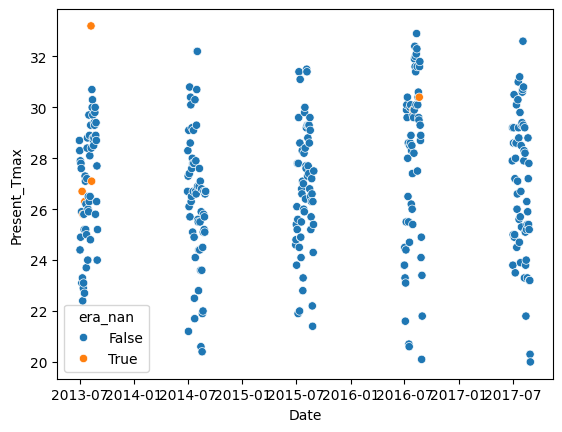

In [27]:
df_ffill = df_simplificado.ffill() # Usa de .ffill() para preencher todos NaNs

df_ffill['era_nan'] = df_simplificado.isna().any(axis=1) # Adiciona uma coluna que é True caso
# houvesse um NaN na dataframe original.

sns.scatterplot(data=df_ffill.loc[df_ffill.station == 1], x='Date', y='Present_Tmax',
            hue='era_nan') # Gera um gráfico de pontos,
# Com dados apenas da estação 1: .loc[df_ffil.station == 1]
# Em que os eixos são Date e Present_Tmax
# As cores são dadas pela coluna 'era_nan'

Este gráfico contém apenas a temperatura máxima, mas já é visível que alguns dados preenchidos (em laranja) estão longe dos outros valores. Teoricamente, os pontos laranjas deveriam estar adjascentes aos pontos azuis, pois `ffill()` preenche com cópia.

Portanto, é necessário preencher de forma que respeite as estações da coluna `"station"` como diferentes grupos. Há diversas abordagens para alcançar isto. Aqui estão as duas mais simples:

#### **Abordagem 1.** Organizar a coluna de acordo com as Stations e as datas

In [28]:
df_organizado = df_simplificado.sort_values(by=['station', 'Date'])
df_organizado.head(5)

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
25,1.0,2013-07-01,28.3,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,5987.718750
50,1.0,2013-07-02,24.4,55.647278,98.370041,27.785497,19.561770,11.168633,74.625920,5981.979492
75,1.0,2013-07-03,27.9,76.017967,95.990532,28.125651,21.982579,10.546499,39.809905,5975.676270
100,1.0,2013-07-04,24.9,55.888565,97.402481,30.458252,22.077078,7.393145,63.599636,5968.809082


Porém, ao se utilizar de apenas esta abordagem, há 25 possíveis lugares em que o `.ffill()` pode falhar: em todas finais de dados de uma Station e começo de dados de outra.

#### **Abordagem 2.** Por .groupby()

Retomando: `.groupby()` agrupa, e organiza, a dataframe de acordo com uma condição. Caso seja passada o nome de uma coluna, os itens serão agrupados de acordo com os valores dela. Assim, o `.ffill()` respeita as fronteiras entre cada `station`.

In [29]:
df_agrupado = df_simplificado.groupby('station').ffill()
df_agrupado

,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
1,2013-06-30,31.9,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,5869.312500
2,2013-06-30,31.6,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,5863.555664
3,2013-06-30,32.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,5856.964844
4,2013-06-30,31.4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,5859.552246
...,...,...,...,...,...,...,...,...,...
7747,2017-08-30,23.3,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,4443.313965
7748,2017-08-30,23.3,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,4438.373535
7749,2017-08-30,23.2,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,4451.345215
7750,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Porém, como visto, perdemos a informação da estação. Porém, o uso de um `.apply(lambda, include_groups=True)` permite mantê-la. Este argumento já é dado por padrão.  

Também é notado outro problema: a coluna `'Date'` pode não estar mais em ordem. Assim, utilizamos de um `.sort_values()` para garantir que esteja.

Também é possível usar de `.apply(lambda, include_groups=False)` e de `.reset_index()`.

**Comentário:**
Em futuras versões do pandas,` groupby().apply()` só vai permitir `include_groups=False`. Assim, para garantir posterioridade, é mantido desta forma:

In [30]:
# Organiza a coluna por datas:
df_agrupado = df_simplificado.sort_values(by='Date').copy()

# Aqui está (em comentário) o outro método, que não será mais utilizável em futuras versões do pandas:
#df_agrupado = df_simplificado.groupby(['station', 'Date']).apply(lambda x: x.ffill(), include_groups=True) # Aplica ffill() por grupo

df_agrupado = df_agrupado.groupby('station').apply(lambda x: x.ffill(), include_groups=False) # Aplica ffil() por grupo
df_agrupado.head(4)


Date  Present_Tmax  LDAPS_RHmin  LDAPS_RHmax  \
station                                                         
1.0     0  2013-06-30          28.7    58.255688    91.116364   
        25 2013-07-01          28.3    72.798576    97.642792   
        50 2013-07-02          24.4    55.647278    98.370041   
        75 2013-07-03          27.9    76.017967    95.990532   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS   LDAPS_LH  \
station                                                                
1.0     0          28.074101         23.006936   6.818887  69.451805   
        25         25.276716         21.142562  15.608045  64.914946   
        50         27.785497         19.561770  11.168633  74.625920   
        75         28.125651         21.982579  10.546499  39.809905   

            Solar radiation  
station                      
1.0     0       5992.895996  
        25      5987.718750  
        50      5981.979492  
        75      5975.676270

In [31]:
df_02_agrupado = df_agrupado.copy()
df_02_agrupado = df_02_agrupado.reset_index() # Retorna a coluna station como uma coluna normal
df_02_agrupado.head(4)

,station,level_1,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,1.0,0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
1,1.0,25,2013-07-01,28.3,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,5987.718750
2,1.0,50,2013-07-02,24.4,55.647278,98.370041,27.785497,19.561770,11.168633,74.625920,5981.979492
3,1.0,75,2013-07-03,27.9,76.017967,95.990532,28.125651,21.982579,10.546499,39.809905,5975.676270


In [32]:
df_02_agrupado = df_02_agrupado.drop(columns=['level_1']) # Remove a coluna extra que foi adicionada
df_02_agrupado.head(3)

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
1,1.0,2013-07-01,28.3,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,5987.718750
2,1.0,2013-07-02,24.4,55.647278,98.370041,27.785497,19.561770,11.168633,74.625920,5981.979492


##### Verificação visual

Vamos visualizar as diferenças entre os dois métodos. Pois utilizamos de .groupby(), sinalizar onde eram os pontos NaNs se torna complicado, mas podemos comparar com o gráfico anterior:

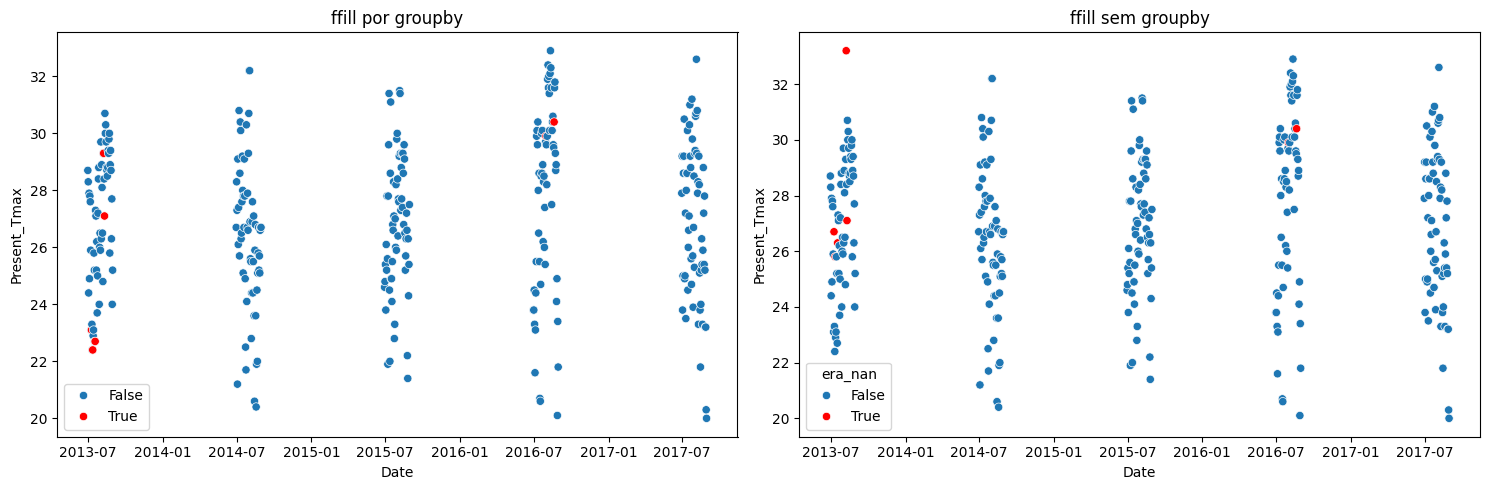

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes = axes.flatten()

# Vamos usar da mesma coluna True/False usada antigamente
lista_nans = df_ffill.loc[df_ffill.station ==1]['era_nan'].reset_index(drop=True)
# O index é removido pois df_2 e df_ffill possuem diferentes index.

# Declara um dicionário de cores
cores = {True: 'red', False: '#1f77b4'} # #1f77b4 é o hex code da cor azul usada pelo seaborn.


sns.scatterplot(data=df_02_agrupado.loc[df_02_agrupado.station == 1], x='Date', y='Present_Tmax',
                hue=lista_nans,
                palette= cores,
                ax=axes[0]) # Desenha no primeiro gráfico
axes[0].set_title("ffill por groupby")
axes[0].legend(loc='lower left') # Muda a legenda pro canto inferior esquerdo


sns.scatterplot(data=df_ffill.loc[df_ffill.station == 1].reset_index(drop=True), x='Date', y='Present_Tmax',
                hue='era_nan', # Usa diferentes cores caso era NaN
                palette=cores,
                ax=axes[1]) # Desenha no segundo gráfico
axes[1].set_title("ffill sem groupby")

plt.tight_layout()
plt.show()

Nota-se que o NaNs foram substituídos com os mesmos valores, então não há valores tão absurdos quanto anteriormente.

## Criando a coluna objetivo para o problema de Regressão

Como exigido pelo objetivo, o modelo tenta explicar a diferença entre a temperature predita e a temperatura real. Logo, devemos adicionar esta informação na dataframe.


Vamos começar adicionando uma coluna com a temperatura do dia seguinte.
Para isso, podemos, novamente, agrupar de acordo com 'Station', e usar do método `.shift()` para movê-la para traz:

In [34]:
df_03_objetivo = df_02_agrupado.copy() # Copiar a DataFrame para a

df_03_objetivo['Tmax_prox'] = df_03_objetivo.groupby('station')['Present_Tmax'].shift(-1)
# .groupby('station') agrupa de acordo com a estação
# ['Present_Tmax'] pega a coluna 'Present_Tmax' deste agrupamento
# .shift(-1) ....

df_03_objetivo.head(3)

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation,Tmax_prox
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996,28.3
1,1.0,2013-07-01,28.3,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,5987.718750,24.4
2,1.0,2013-07-02,24.4,55.647278,98.370041,27.785497,19.561770,11.168633,74.625920,5981.979492,27.9


Agora, adiciona-se a diferença entre a previsão e a

In [35]:
df_03_objetivo['dif_Tmax'] = df_03_objetivo['LDAPS_Tmax_lapse'] - df_03_objetivo['Tmax_prox']
df_03_objetivo.head(3) # Mostra as 3 primeiras linhas.

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation,Tmax_prox,dif_Tmax
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996,28.3,-0.225899
1,1.0,2013-07-01,28.3,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,5987.718750,24.4,0.876716
2,1.0,2013-07-02,24.4,55.647278,98.370041,27.785497,19.561770,11.168633,74.625920,5981.979492,27.9,-0.114503


#### Exercicio
Adicione uma coluna `dif_Tmin` a `df_2`.

In [37]:
# Crie uma coluna auxiliar
df_03_objetivo['Tmin_prox'] = df_03_objetivo.groupby('...')

# Crie a coluna desejada
df_03_objetivo['dif_Tmin'] = ...

df_03_objetivo.head(3) # Cheque o resultado

KeyError: '...'

### Inspeção final do DataFrame

In [ ]:
df_03_objetivo.info()

Note que os ultimos valores de cada Station é NAN poís não há valor futuro.

In [ ]:
df_03_objetivo.loc[df_03_objetivo['station'] == 25].tail(5)

In [40]:
df_final = df_03_objetivo.dropna().copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7725 entries, 0 to 7748
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7725 non-null   float64       
 1   Date              7725 non-null   datetime64[ns]
 2   Present_Tmax      7725 non-null   float64       
 3   LDAPS_RHmin       7725 non-null   float64       
 4   LDAPS_RHmax       7725 non-null   float64       
 5   LDAPS_Tmax_lapse  7725 non-null   float64       
 6   LDAPS_Tmin_lapse  7725 non-null   float64       
 7   LDAPS_WS          7725 non-null   float64       
 8   LDAPS_LH          7725 non-null   float64       
 9   Solar radiation   7725 non-null   float64       
 10  Tmax_prox         7725 non-null   float64       
 11  dif_Tmax          7725 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 784.6 KB


---

# Modelagem
Para a modelagem, primeiramente é necessário importar as bibliotecas.

Aqui elas foram importadas separadas por tópico, mas podem ser importadas todas de uma vez.

## Train/Test Split

In [41]:
from sklearn.model_selection import train_test_split # Importar a função

É necessário remover os NaN criados durante a produção da colunas de diferenças. (Os últimos dias, que não possuem nenhum dado após).


E agora remover a coluna Date completamente, ou alterá-la para uma forma numérica:

In [42]:
df_final['Dia_Ano'] = df_final['Date'].dt.dayofyear # Passa de Data para dia do ano
df_final.head(3)

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation,Tmax_prox,dif_Tmax,Dia_Ano
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996,28.3,-0.225899,181
1,1.0,2013-07-01,28.3,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,5987.718750,24.4,0.876716,182
2,1.0,2013-07-02,24.4,55.647278,98.370041,27.785497,19.561770,11.168633,74.625920,5981.979492,27.9,-0.114503,183


In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7725 entries, 0 to 7748
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7725 non-null   float64       
 1   Date              7725 non-null   datetime64[ns]
 2   Present_Tmax      7725 non-null   float64       
 3   LDAPS_RHmin       7725 non-null   float64       
 4   LDAPS_RHmax       7725 non-null   float64       
 5   LDAPS_Tmax_lapse  7725 non-null   float64       
 6   LDAPS_Tmin_lapse  7725 non-null   float64       
 7   LDAPS_WS          7725 non-null   float64       
 8   LDAPS_LH          7725 non-null   float64       
 9   Solar radiation   7725 non-null   float64       
 10  Tmax_prox         7725 non-null   float64       
 11  dif_Tmax          7725 non-null   float64       
 12  Dia_Ano           7725 non-null   int32         
dtypes: datetime64[ns](1), float64(11), int32(1)
memory usage: 814.7 KB


Então, separam-se os dados em uma parte de teste e uma parte de treinamento.

Adapte o código para incluir as colunas criada por você.

In [44]:
x_vars = df_final.drop(['dif_Tmax'],axis=1)

# Select only numeric columns for scaling (note que a coluna Date é não numerica)
x_vars = x_vars.select_dtypes(include=[np.number])

y_var_tmax = df_final['dif_Tmax']

#y_var_tmin = ...

x_train, x_test, y_train, y_test = train_test_split(x_vars, # Variáveis X
                                                    y_var_tmax, # Variáveis objetivos
                                                    test_size=0.3, # Usar 30% dos dados para teste
                                                    random_state=123)

## Modelos


### RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor # Regressor escolhido

Declaram-se as variáveis, treina e retorna a precisão:

In [46]:
rfr = RandomForestRegressor() # Declara uma variável para a o modelo

rfr.fit(x_train, y_train) # Treina o modelo

rfr.score(x_test, y_test) # Testa o modelo

0.9891770404868768

**Uma precisão de deste valor (~99%) parece boa. Porém, é necessário duvidar de todas precisões tão altas.**

Estas extremas precisões normalmente indicam que há algum problema com o dataset de treinamento. No nosso caso, é *Data Leakage*: ainda há a presença da coluna `Tmax/min_prox` . Porém, em casos reais, esta variável não estará disponível, pois estamos justamente predizendo o dia seguinte.

Adapte o código para remover estas colunas:

In [47]:
# Lista com colunas que serão removidas das variáveis x
cols_to_drop = ['Tmax_prox', 'dif_Tmax']

x_vars = df_final.drop(cols_to_drop,axis=1)
x_vars = x_vars.select_dtypes(include=[np.number])

y_var_tmax = df_final['dif_Tmax']

#y_var_tmin = ...

x_train, x_test, y_train, y_test = train_test_split(x_vars, # Variáveis X
                                                    y_var_tmax, # Variáveis objetivos
                                                    test_size=0.3, # Usar 30% dos dados para teste
                                                    random_state=123)

Agora, com a nova separação, treine e avalie o modelo novamente:

In [48]:
rfr = RandomForestRegressor() # Salva o modelo a rfr

rfr.fit(x_train, y_train) # Treina o modelo

rfr.score(x_test, y_test) # Retorna o score padrão

0.5584731362092644

É um valor muito mais baixo. Porém, ainda é um bom valor; e indica que relações significativas. Pode-se tentar alterar e ajustar certos valores, padronizar os dados, ou utilizar de outro modelo.

É interessante notar que o uso de Standard Scaler não auxilia muito a precisão, visto que RandomForest é apenas uma coleção de DecisionTrees, portanto não é um método baseado em distância:

In [49]:
from sklearn.preprocessing import StandardScaler # Scaler

In [50]:
scaler = StandardScaler() # Scaler

x_vars_tmax = df_final.drop(['dif_Tmax', 'Tmax_prox'],axis=1) # Remove as colunas para regressão de TMax
x_vars_tmax = x_vars_tmax.select_dtypes(include=[np.number])

y_var_tmax = df_final['dif_Tmax']

x_train_tmax, x_test_tmax, y_train_tmax, y_test_tmax = train_test_split(x_vars_tmax,
                                                    y_var_tmax,
                                                    test_size=0.2, # 20% dos dados para teste
                                                    random_state=123)

scaler.fit(x_train_tmax) # Treina o scaler

x_train = scaler.transform(x_train_tmax) # Normaliza os dados de treino

x_test = scaler.transform(x_test_tmax) # Normaliza os dados de teste

rfr = RandomForestRegressor() # Modelo

rfr.fit(x_train_tmax, y_train_tmax) # Treina o modelo

rfr.score(x_test_tmax, y_test_tmax) # Retorna a avaliação padrão

0.5926760474669073

---

## Pipelines

Nota-se que, com a inclusão de modelos mais complicados, *scalers*, e outras modificações, o tamanho do código aumenta. Juntamente, aumenta a probabilidade de erros, além dos erros clássicos que param o código completamente.  

A biblioteca sklearn permite a criação de [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), objetos que realizam toda a transformação e treinamento de apenas uma vez:

In [51]:
from sklearn.pipeline import Pipeline, make_pipeline

Você não precisa destas duas funções, ambas retornam o mesmo objeto. Porém, com `Pipeline()`, é necessário declarar o nome de cada etapa. Já `make_pipeline` declara automaticamente.

O argumento de `Pipeline()` é uma lista (em ordem) com tuples `('nome', modelo)`:


```
tuple_1 = ( 'scaler' , StandardScaler() )
tuple_2 = ( 'model' , KMeans() )
lista = [tuple_1, tuple_2]
Pipeline(lista)

```

Já `make_pipeline` só exige os modelos em ordem:



```
make_pipeline( StandardScaler() , KMeans() )
```


Ilustra-se com o exemplo de RandomForest:

In [52]:
pipe_1 = make_pipeline(scaler, rfr)
pipe_1

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [53]:
pipe_1 = Pipeline([('scaler', scaler), # O modelo de normalização, com nome 'scaler'
                   ('model', rfr)]) # O modelo de regressão, com nome 'model'
pipe_1

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

O uso é semelhante ao dos modelos já apresentados, com `.fit()` e com `.score()` também presentes:



In [54]:
pipe_1.fit(x_train_tmax, y_train_tmax) # Treina a pipeline
pipe_1.score(x_test_tmax, y_test_tmax) # Avalia a pipeline

0.592742918076111

# Avaliação

Os resultados parecem bons, porém, há um erro enorme no método de avaliação usado até então.

`train_test_split` realiza um shuffle nos dados. De forma que os dados estão aleatórios em `x/y_train/test`. Isto é bom para casos em que os dados não são sequenciais, porém para dados climáticos, a sequência é essencial.

Caso isto não seja considerado, o modelo treina com dados futuros, e seu uso na vida real é desconsiderável.

Para isso, vamos criar uma DataFrame ordenada por datas:

In [55]:
df_avaliacao = df_03_objetivo.copy().sort_values(by='Date').dropna().reset_index(drop=True)
df_avaliacao['Date'] = pd.to_datetime(df_avaliacao['Date'])
df_avaliacao['Date'] = df_avaliacao['Date'].dt.dayofyear
df_avaliacao.head(3)

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation,Tmax_prox,dif_Tmax
0,1.0,181,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996,28.3,-0.225899
1,19.0,181,31.4,52.265926,75.483757,29.273668,24.970151,6.359286,36.339969,5893.578125,30.8,-1.526332
2,15.0,181,32.5,51.773392,72.999237,29.640103,25.152909,6.360547,32.275122,5866.655762,30.1,-0.459897


## Cross_val_score

`cross_val_score` é uma função que permite resolver este problema, assim como outro:  
Se o modelo depende de certa aleatoridade, como que garantimos que o modelo não foi sortudo?



In [56]:
from sklearn.model_selection import cross_val_score

A função [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) permite rodar um mesmo modelo em diferentes partes dos dados, e retorna uma lista com os diferentes resultados.   
Sua execução simplificada é dada por:


```
score_list = cross_val_score(model, # ou pipeline
x_vars,
y_vars,
cv = 5 # Número ou uma função separadora
scoring = 'r2' # Opcional, função que determina o valor dado
)
```




Utilizando o exemplo com a mesma configuração de `pipe = pipe_1`, de RandomForestRegressor()

In [57]:
x_vars_tmax = df_avaliacao.drop(['dif_Tmax', 'Tmax_prox'],axis=1)

y_var_tmax = df_avaliacao['dif_Tmax']

In [58]:
pipe = make_pipeline(scaler, rfr)

score_list_1 = cross_val_score(pipe, x_vars_tmax, y_var_tmax, cv=5)
print(
    'A lista completa:', score_list_1,
    '\n \n A média é:', score_list_1.mean(),
    '\n \n O desvio padrão é:', score_list_1.std()
)


A lista completa: [0.01328351 0.02941883 0.22692422 0.18168181 0.16734323] 
 
 A média é: 0.12373031953597466 
 
 O desvio padrão é: 0.086026271627193


Porém, ainda há um problema, ao usar de um número no argumento `cv= int`, o modelo naturalmente usa da validação `KFold`, que separa o modelo em `int` classes ordenadas:

Desta forma, `cv=5` é equivalente a:



```
from sklearn.model_selection import KFold # Importar

Kfolds = KFold(n_splits=5, # 5 Grupos
               shuffle=False) # Não embaralhar
```
Caso deseje manter um embaralho dos dados - assim como train_test_split - use do argumento `shuffle=True`.


![Gráfico de separação KFold shuffle=False](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_002.png)

De forma que o problema não é resolvido. Por isso, são permitidos o uso de [classes extras](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators). De interesse para nós é o `TimeSeriesSplit`, que separa em grupos sequenciais:

![Gráfico da separação TimeSeriesSplit](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png)

#### TimeSeriesSplit

In [59]:
from sklearn.model_selection import TimeSeriesSplit

Todo o resto do código é o mesmo, a única diferença é o argumento `cv`

In [60]:
tseries_iterator = TimeSeriesSplit(n_splits=5) # Declara 5 grupos de TimeSeriesSplit
pipe = make_pipeline(scaler, rfr) # Faz uma pipeline com Scaler e RandomForestRegressor


score_list_2 = cross_val_score(pipe, # Use a variável pipe como modelo
                               x_vars_tmax,
                               y_var_tmax,
                               cv=tseries_iterator) # Use tseries_iterator como grupos


print(
    'A lista completa:', score_list_2,
    '\n \n A média é:', score_list_2.mean(),
    '\n \n O desvio padrão é:', score_list_2.std()
)

A lista completa: [ 0.05653082 -0.04026148  0.16435646  0.17150518 -0.05654075] 
 
 A média é: 0.05911804491170105 
 
 O desvio padrão é: 0.09691845089304509


Pela análise da performance, conclui-se que o modelo não é adequado para o objetivo.

### Métricas de avaliação diferente.
Há outras formas de avaliar um modelo por `cross_val_score`. Por padrão, modelos de regressão usam de R² e modelos de classificação usam de precisão. Mas é possível usar um [modelo pre-definido](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) do sklearn, ou fazer sua própria função de avaliação.

Vamos usar de `"neg_mean_squared_error"` como exemplo:

In [61]:
tseries_iterator = TimeSeriesSplit(n_splits=5) # Declara 5 grupos de TimeSeriesSplit
pipe = make_pipeline(scaler, rfr) # Faz uma pipeline com Scaler e RandomForestRegressor


score_list_3 = cross_val_score(pipe, # Use a variável pipe como modelo
                               x_vars_tmax,
                               y_var_tmax,
                               cv=tseries_iterator, # Use tseries_iterator como grupos
                               scoring="neg_mean_squared_error") # Use o MSE como métrica


print(
    'A lista completa:', score_list_3,
    '\n \n A média é:', score_list_3.mean(),
    '\n \n O desvio padrão é:', score_list_3.std()
)

A lista completa: [-3.29065885 -2.2511412  -2.43507368 -3.21767811 -3.41850659] 
 
 A média é: -2.9226116859273454 
 
 O desvio padrão é: 0.4810406603439614


## Usando `cross_val_score` e `GridSearchCV` juntos
Há casos em que é desejado procurar o melhor hiperparâmetro, porém ainda considerando essas validações especiais.   
O uso também é simples, pois o próprio `GridSearchCV` providência o argumento `cv`, igual ao do `cross_val_score`. Ou seja, caso queira otimizar os hiperparâmetros, é só passar o argumento `cv` com um número ou um objeto `iterator`, como o `TimeSeriesSplit`.

In [65]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {'randomforestregressor__n_estimators': [100, 150, 200],
               'randomforestregressor__max_features': [1,2]}

In [72]:
gscv = GridSearchCV(pipe, param_grid,
                    scoring='neg_mean_squared_error',
                    cv=tseries_iterator, #Usa o time_series_iterator que criamos para separar teste e validação
                    verbose=1) # Mostra mais output.

In [73]:
gscv.fit(x_vars_tmax, y_var_tmax)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_features': [1, 2],
                         'randomforestregressor__n_estimators': [100, 150,
                                                                 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [74]:
gscv.best_params_

{'randomforestregressor__max_features': 1,
 'randomforestregressor__n_estimators': 200}

In [76]:
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_features,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.538857,0.249473,0.021360,0.003600,1,100,"{'randomforestregressor__max_features': 1, 'ra...",-3.008494,-1.839077,-2.621236,-3.295994,-3.198784,-2.792717,0.529825,4
1,0.758007,0.347229,0.029557,0.005032,1,150,"{'randomforestregressor__max_features': 1, 'ra...",-2.980679,-1.805647,-2.632540,-3.312285,-3.169067,-2.780043,0.537788,3
2,1.024471,0.469556,0.038815,0.007256,1,200,"{'randomforestregressor__max_features': 1, 'ra...",-2.995804,-1.754612,-2.608955,-3.305751,-3.141469,-2.761318,0.553638,1
3,0.800361,0.374079,0.020384,0.002846,2,100,"{'randomforestregressor__max_features': 2, 'ra...",-3.004850,-1.847902,-2.576978,-3.206916,-3.217273,-2.770784,0.516454,2
4,1.224262,0.591081,0.028936,0.004594,2,150,"{'randomforestregressor__max_features': 2, 'ra...",-3.111662,-1.889161,-2.572064,-3.250813,-3.233536,-2.811447,0.523306,6
5,1.791552,0.885581,0.048568,0.015166,2,200,"{'randomforestregressor__max_features': 2, 'ra...",-3.039991,-1.830151,-2.613041,-3.248628,-3.240859,-2.794534,0.534534,5


### Visualização dos Erros

Também podemos usar de `TimeSeriesSplit` para separar os dados, e então graficar a predição:

In [46]:
tseries_iterator_2 = TimeSeriesSplit(n_splits=2, # Vamos usar de dois grupos
                                     test_size=50) # Cada teste terá 50 amostras


O método `.split(df)` retorna os índices da separação, em duas variáveis. Uma para o treino, e outra para o teste:

In [47]:
for train_index, test_index in tseries_iterator_2.split(x_vars_tmax): # For loop para cada grupo
  x_train, x_test = x_vars_tmax.iloc[train_index], x_vars_tmax.iloc[test_index]
  y_train, y_test = y_var_tmax.iloc[train_index], y_var_tmax.iloc[test_index]
x_train.head()

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,1.0,181,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
1,19.0,181,31.4,52.265926,75.483757,29.273668,24.970151,6.359286,36.339969,5893.578125
2,15.0,181,32.5,51.773392,72.999237,29.640103,25.152909,6.360547,32.275122,5866.655762
3,12.0,181,31.6,51.288349,80.338013,28.936314,24.365949,6.423993,28.719288,5924.328613
4,23.0,181,32.7,54.705585,75.919823,28.857981,24.733711,6.019616,90.838489,5851.387695


In [ ]:
y_train.head()

,dif_Tmax
0,-0.225899
1,-1.526332
2,-0.459897
3,-3.063686
4,-2.642019


Ao unir tudo para dois gráficos, um para cada grupo:

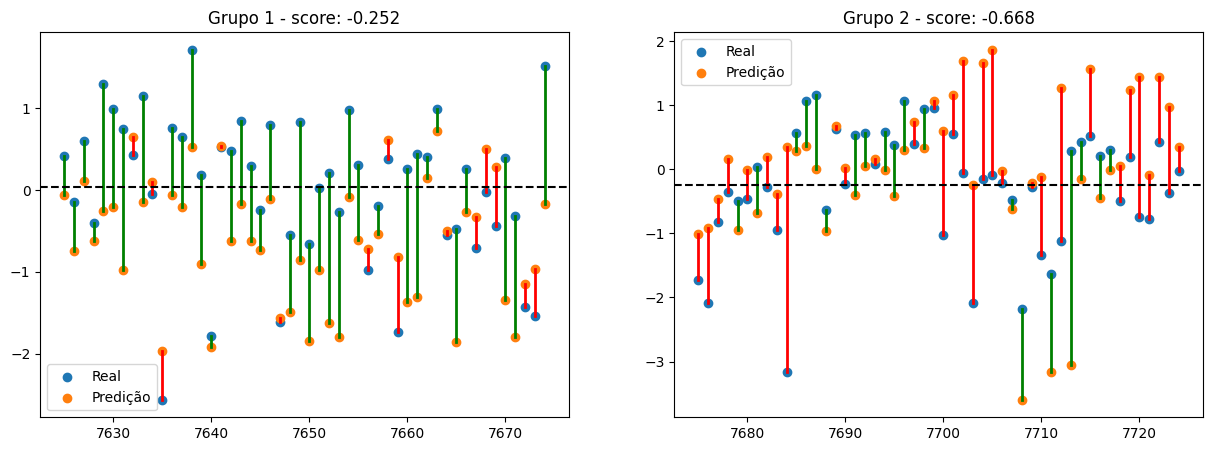

In [48]:
# Define as variáveis para o gráfico
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Transforma a array de gráficos em uma lista uni-dimensional
axes = axes.flatten()

# Começa a contagem
i = 0

# Começa o loop
for train_index, test_index in tseries_iterator_2.split(x_vars_tmax):
  # Define as variáveis de treino e teste
  x_train, x_test = x_vars_tmax.iloc[train_index], x_vars_tmax.iloc[test_index]
  y_train, y_test = y_var_tmax.iloc[train_index], y_var_tmax.iloc[test_index]



  # Faz o modelo com a variável deste grupo
  pipe_visu = make_pipeline(scaler, rfr)
  pipe_visu.fit(x_train, y_train)


  # Define os valores a serem usados nos gráficos
  x_values = y_test.index
  y_real = y_test.values
  y_pred = pipe_visu.predict(x_test)
  score = pipe_visu.score(x_test, y_test)

  # Configura o gráfico
  axes[i].scatter(x_values, y_real, label='Real')
  axes[i].scatter(x_values, y_pred, label='Predição')
  axes[i].legend()
  axes[i].set_title(f'Grupo {i+1} - score: %.3f' % score)

  # Faz linhas destacando a diferença entre os valores
  for j in range(len(x_values)):
    # Usa linhas vermelha para quando sobre-estimou
    if y_real[j] <= y_pred[j]:
      axes[i].plot([x_values[j], x_values[j]], [y_real[j], y_pred[j]],
              color='red', linewidth=2)
    # Usa linhas verdes para quando sub-estimou
    else:
      axes[i].plot([x_values[j], x_values[j]], [y_real[j], y_pred[j]],
              color='green', linewidth=2)

  # Adiciona uma linha da média no gráfico, pois o método de score é R²
  axes[i].axhline(y=y_real.mean(), color='black', linestyle='--')
  i += 1

# Diferentes Modelos

Também é interessante tentar diferentes modelos, e determinar se há outro mais adequado para nosso objetivo. Todos tem o mesmo processo de treinamento:

## KNNRegressor

Primeiro, importa-se o modelo:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knnregressor = KNeighborsRegressor() # Declara o modelo a uma variável
pipe_knn = make_pipeline(scaler, knnregressor) # Faz uma pipeline scaler -> knn

pipe = make_pipeline(scaler, rfr) # Faz uma pipeline com Scaler e RandomForestRegressor


score_list_2 = cross_val_score(pipe, # Use a variável pipe como modelo
                               x_vars_tmax,
                               y_var_tmax,
                               cv=tseries_iterator) # Use tseries_iterator para definir grupos


print(
    'A lista completa:', score_list_2,
    '\n \n A média é:', score_list_2.mean(),
    '\n \n O desvio padrão é:', score_list_2.std()
)

A lista completa: [ 0.05222887 -0.02528359  0.1770627   0.17526163 -0.05474224] 
 
 A média é: 0.06490547477464947 
 
 O desvio padrão é: 0.09733248358457722


## Neural Networks

Até modelos mais complicados, como _Neural Networks_, seguem o mesmo formato de código. Por exemplo, o [Multi-Layer Peceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor):

In [ ]:
from sklearn.neural_network import MLPRegressor # Importa o modelo de scikit-learn

In [ ]:
neuralnetworkregressor = MLPRegressor() # Declara o modelo a uma variável
pipe_knn = make_pipeline(scaler, neuralnetworkregressor) # Faz uma pipeline scaler -> MLP

pipe = make_pipeline(scaler, rfr) # Faz uma pipeline com Scaler e RandomForestRegressor


score_list_2 = cross_val_score(pipe, # Use a variável pipe como modelo
                               x_vars_tmax,
                               y_var_tmax,
                               cv=tseries_iterator) # Use tseries_iterator para definir grupos


print(
    'A lista completa:', score_list_2,
    '\n \n A média é:', score_list_2.mean(),
    '\n \n O desvio padrão é:', score_list_2.std()
)

A lista completa: [ 0.02752377 -0.03875039  0.17393949  0.15271386 -0.0401024 ] 
 
 A média é: 0.05506486724142725 
 
 O desvio padrão é: 0.09195990782497905


Nota-se que, mesmo com tratamento de dados, mudanças de variáveis, e modelos mais potentes, a performance ainda é ruim. Neste caso, é pois modelos dependente de tempos geralmente precisam de modelos dedicados a problemas de _time series_.

Mas, quando isso acontece, geralmente indica que é necessário repensar sobre o problema, e as soluções usadas. Podemos trocar o tipo de Machine Learning, e tentar outros, como classificação:

# Comentários

## Lidando com os pulos entre datas

Um dos problemas na nossa abordagem do pre-processamento de dados surge do fato que há grandes períodos sem nenhum dado. Porém, ao usar de `ffill()` e `shift()`, estes pulos são preenchidos como se fossem dados do dia seguinte. Segue um exemplo:

In [49]:
df_02_agrupado.head(65).tail(5)
# Note que vamos de 2013 para 2014

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
60,1.0,2013-08-29,24.0,55.515987,97.259445,26.249102,21.574282,8.861917,74.211014,4654.086426
61,1.0,2013-08-30,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230
62,1.0,2014-06-30,26.7,42.405796,90.381340,29.755193,20.790658,6.878180,70.140309,5992.895996
63,1.0,2014-07-01,28.3,60.537922,90.401695,27.491285,21.894515,8.014667,52.369751,5987.718750
64,1.0,2014-07-02,27.3,79.543968,96.919571,21.560918,19.612185,9.767487,76.568310,5981.979492


Abaixo segue *uma* abordagem para o problema. Outros métodos também são possíveis, como o uso de *if statements*, funções condicionais, interpolação, usos mais cautelosos de `shift()` e `ffill()`, etc.

In [50]:
df_coment_1 = df_simplificado.copy()
df_coment_1.head(3)

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
1,2.0,2013-06-30,31.9,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,5869.312500
2,3.0,2013-06-30,31.6,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,5863.555664


Vamos usar de `'Date'` como index. O *pandas* oferece diversos métodos específicos para quando o index é `datetime`.

In [51]:
df_coment_2 = df_coment_1.set_index('Date')
df_coment_2.head()

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
Date,,,,,,,,,
2013-06-30,1.0,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
2013-06-30,2.0,31.9,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,5869.312500
2013-06-30,3.0,31.6,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,5863.555664
2013-06-30,4.0,32.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,5856.964844
2013-06-30,5.0,31.4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,5859.552246


Um método de interesse é o [`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). Este método converte um índice datetime de uma frequência ( por exemplo, mês) para outra (por exemplo, dia). No nosso caso, vamos converter de dia para dia, pois resample() preenche lacunas de tempo com NaN.

Nota-se que [`asfreq()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html#pandas.DataFrame.asfreq) também pode ser usado, porém não diretamente no `.groupby()`.

In [53]:
df_coment_3 = df_coment_2.groupby('station', group_keys=False).resample('D').first()
# Primeiro, agrupa-se por estações:
## .groupby('station', group_keys=False)
## group_keys=False é usado para não usar 'station' como index.
# Então, em cada grupo, usa .resample('D') para mudar as datas para diário
## isso, por consequência, preenche os "pulos temporais" com dados:
# Pois é um método de agrupamento, é necessário aplicar uma função nela, o .first()
## retorna o primeiro valor visto em um dia (por estação)

# Note como ficam os espaços que não haviam dados:
df_coment_3.head(70).tail(10)

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
Date,,,,,,,,,
2013-08-29,1.0,24.0,55.515987,97.259445,26.249102,21.574282,8.861917,74.211014,4654.086426
2013-08-30,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230
2013-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Entre os argumentos possíveis de `ffill()`, podemos limitar quantas linhas de NaN podem ser preenchidas de uma vez.

Também se poderia usar de interpolação, o que garantiria menor erro.

In [54]:
df_coment_4 = df_coment_3.copy().ffill(limit=1)
df_coment_4.head(70).tail(10)

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
Date,,,,,,,,,
2013-08-29,1.0,24.0,55.515987,97.259445,26.249102,21.574282,8.861917,74.211014,4654.086426
2013-08-30,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230
2013-08-31,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230
2013-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


E como já está em dia, o `shift(-1)` só vai pegar valores de um dia para o outro.  O código é o mesmo, porém como vamos agrupar por station, vamos usar de `ffill()` pra preencher apenas esta coluna:

In [55]:
df_coment_5 = df_coment_4.copy()
df_coment_5['station'] = df_coment_5['station'].ffill()
df_coment_5.head(70).tail(10)

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
Date,,,,,,,,,
2013-08-29,1.0,24.0,55.515987,97.259445,26.249102,21.574282,8.861917,74.211014,4654.086426
2013-08-30,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230
2013-08-31,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230
2013-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-02,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Então se cria as colunas objetivos:

In [56]:
df_coment_6 = df_coment_5.copy()
df_coment_6['Tmax_prox'] = df_coment_6.groupby('station')['Present_Tmax'].shift(-1)
df_coment_6['dif_Tmax'] = df_coment_6['Tmax_prox'] - df_coment_6['LDAPS_Tmax_lapse']
df_coment_6.head(70).tail(15)
#df_coment_5.loc[df_coment_5.isnull().any(axis=1)]

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation,Tmax_prox,dif_Tmax
Date,,,,,,,,,,,
2013-08-24,1.0,28.9,44.135838,82.987381,30.084378,21.064253,5.581645,80.755618,4843.142090,29.4,-0.684378
2013-08-25,1.0,29.4,44.831951,80.271233,29.595940,22.042964,7.274261,85.155525,4806.717773,28.7,-0.895940
2013-08-26,1.0,28.7,56.245354,85.846481,27.828129,20.715751,7.059589,77.443042,4769.281738,26.3,-1.528129
2013-08-27,1.0,26.3,63.864258,87.882706,27.019654,21.916139,7.067036,72.687327,4731.345215,27.7,0.680346
2013-08-28,1.0,27.7,68.143227,96.937813,25.977616,22.966578,12.988676,43.629510,4692.945313,24.0,-1.977616
2013-08-29,1.0,24.0,55.515987,97.259445,26.249102,21.574282,8.861917,74.211014,4654.086426,25.2,-1.049102
2013-08-30,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230,25.2,-1.172107
2013-08-31,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230,NaN,NaN
2013-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notam-se os valores "extrapolados" cujos dados são copiados identicamente ao anterior (pois a linha era inteiramente NaN). Mas por consequência do `shift(-1)`, eles possuem `NaNs` e serão removidos por .`dropna()`.   
Só resta, então, remover a penúltima linha antes de cada pulo, pois não temos informação de `"TMax_prox"` delas. Para isso, pode-se introduzir uma coluna auxiliar com `NaNs`:

In [57]:
df_coment_7 = df_coment_6.copy()
df_coment_7['Coluna_aux'] = df_coment_7['dif_Tmax'].shift(-1)
df_coment_7.head(70).tail(15)
#df_coment_5.loc[df_coment_5.isnull().any(axis=1)]

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation,Tmax_prox,dif_Tmax,Coluna_aux
Date,,,,,,,,,,,,
2013-08-24,1.0,28.9,44.135838,82.987381,30.084378,21.064253,5.581645,80.755618,4843.142090,29.4,-0.684378,-0.895940
2013-08-25,1.0,29.4,44.831951,80.271233,29.595940,22.042964,7.274261,85.155525,4806.717773,28.7,-0.895940,-1.528129
2013-08-26,1.0,28.7,56.245354,85.846481,27.828129,20.715751,7.059589,77.443042,4769.281738,26.3,-1.528129,0.680346
2013-08-27,1.0,26.3,63.864258,87.882706,27.019654,21.916139,7.067036,72.687327,4731.345215,27.7,0.680346,-1.977616
2013-08-28,1.0,27.7,68.143227,96.937813,25.977616,22.966578,12.988676,43.629510,4692.945313,24.0,-1.977616,-1.049102
2013-08-29,1.0,24.0,55.515987,97.259445,26.249102,21.574282,8.861917,74.211014,4654.086426,25.2,-1.049102,-1.172107
2013-08-30,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230,25.2,-1.172107,NaN
2013-08-31,1.0,25.2,45.512745,92.010162,26.372107,19.675469,6.540047,77.811827,4614.761230,NaN,NaN,NaN
2013-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Então, removem-se os NaNs, e a coluna auxiliar:

In [58]:
# Remove os NaN
df_coment_8 = df_coment_7.copy().dropna()

# Tira a coluna Date do index:
df_coment_8 = df_coment_8.reset_index()

# Remove a coluna auxiliar:
df_coment_8 = df_coment_8.drop(columns=['Coluna_aux'])
df_coment_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7561 non-null   datetime64[ns]
 1   station           7561 non-null   float64       
 2   Present_Tmax      7561 non-null   float64       
 3   LDAPS_RHmin       7561 non-null   float64       
 4   LDAPS_RHmax       7561 non-null   float64       
 5   LDAPS_Tmax_lapse  7561 non-null   float64       
 6   LDAPS_Tmin_lapse  7561 non-null   float64       
 7   LDAPS_WS          7561 non-null   float64       
 8   LDAPS_LH          7561 non-null   float64       
 9   Solar radiation   7561 non-null   float64       
 10  Tmax_prox         7561 non-null   float64       
 11  dif_Tmax          7561 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 709.0 KB


### Modelagem

A modelagem vai seguir da mesma forma.  
Troca-se "Date" por dia do ano, e definem-se as variáveis:

In [59]:
df_coment_final = df_coment_8.copy()

# Organiza por datas
df_coment_final = df_coment_final.sort_values(by=['Date']).reset_index(drop=True)

# Muda de data para dia do ano
df_coment_final['Date'] = df_coment_final['Date'].dt.dayofyear


x_vars_coment = df_coment_final.drop(['dif_Tmax', 'Tmax_prox'],axis=1)

y_var_coment = df_coment_final['dif_Tmax']

x_vars_coment.head()

,Date,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation
0,181,1.0,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996
1,181,11.0,31.7,51.156395,85.385635,29.694724,24.432646,6.411812,55.690312,5864.000977
2,181,23.0,32.7,54.705585,75.919823,28.857981,24.733711,6.019616,90.838489,5851.387695
3,181,16.0,30.7,56.848339,84.408173,28.476517,23.695151,5.639549,83.417605,5861.383301
4,181,25.0,32.5,50.274609,75.525017,29.963753,24.972864,6.265457,23.342176,5855.093750


In [60]:
pipe_coment = make_pipeline(scaler, rfr)

tseries_iterator = TimeSeriesSplit(n_splits=5) # Declara 5 grupos de TimeSeriesSplit

score_list_coment = cross_val_score(pipe_coment, # Use a variável pipe como modelo
                               x_vars_coment,
                               y_var_coment,
                               cv=tseries_iterator) # Use tseries_iterator


print(
    'A lista completa:', score_list_coment,
    '\n \n A média é:', score_list_coment.mean(),
    '\n \n O desvio padrão é:', score_list_coment.std()
)

A lista completa: [ 4.33989582e-02  1.52070580e-04  1.31406543e-01  2.24861498e-01
 -4.64425899e-02] 
 
 A média é: 0.07067529610816761 
 
 O desvio padrão é: 0.09684605573419648


Observa-se que a performance melhorou pouco. Não se espera um aumento tão grande, visto que o volume de dados foi tão grande que erros no preprocessamento não impacte tanto a performance.

## Visualizando os erros

Podemos, assim como fizemos acima, visualizar os erros em certas amostras testes:

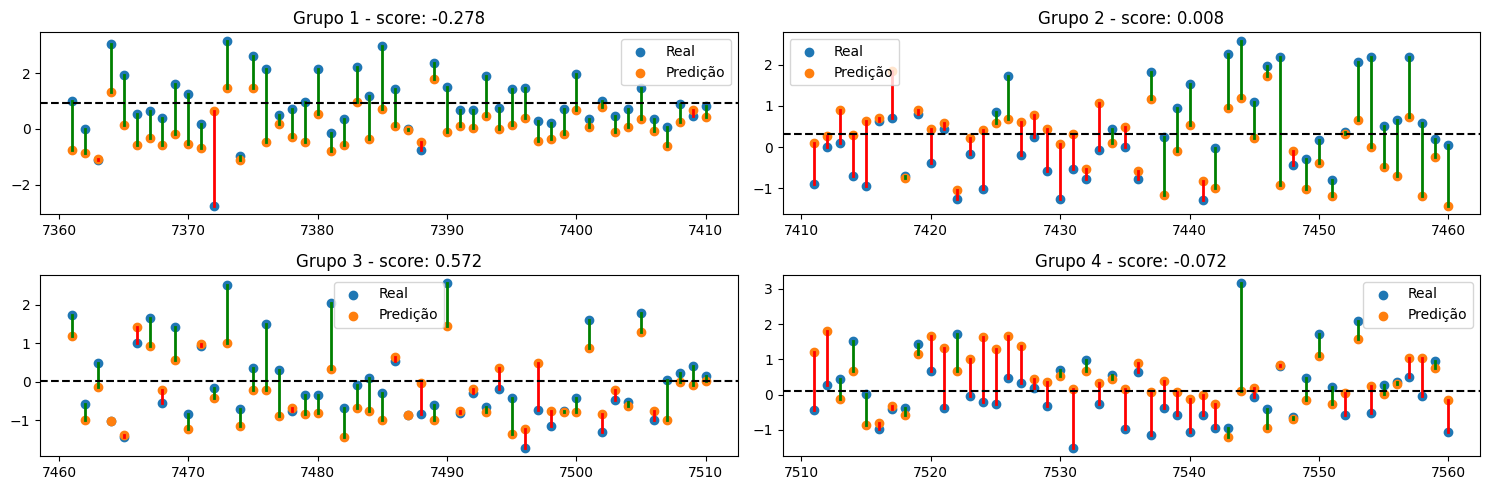

In [ ]:
# Define as variáveis para o gráfico
fig, axes = plt.subplots(2, 2, figsize=(15,5))

tseries_iterator_coment = TimeSeriesSplit(n_splits=4, # Vamos usar de 4 grupos
                                         test_size=50) # Haverão apenas 50 amostras em cada teste

# Transforma a array de gráficos em uma lista uni-dimensional
axes = axes.flatten()

# Começa a contagem
i = 0

# Começa o loop
for train_index, test_index in tseries_iterator_coment.split(x_vars_coment):
  # Define as variáveis de treino e teste
  x_train, x_test = x_vars_coment.iloc[train_index], x_vars_coment.iloc[test_index]
  y_train, y_test = y_var_coment.iloc[train_index], y_var_coment.iloc[test_index]



  # Faz o modelo com a variável deste grupo
  pipe_visu = make_pipeline(scaler, rfr)
  pipe_visu.fit(x_train, y_train)
  score = pipe_visu.score(x_test, y_test)


  # Define os valores a serem usados nos gráficos
  x_values = y_test.index
  y_real = y_test.values
  y_pred = pipe_visu.predict(x_test)

  # Configura o gráfico
  axes[i].scatter(x_values, y_real, label='Real')
  axes[i].scatter(x_values, y_pred, label='Predição')
  axes[i].legend()
  axes[i].set_title(f'Grupo {i+1} - score: %.3f' % score)
  # Faz linhas destacando a diferença entre os valores
  for j in range(len(x_values)):
    # Usa linhas vermelha para quando sobre-estimou
    if y_real[j] <= y_pred[j]:
      axes[i].plot([x_values[j], x_values[j]], [y_real[j], y_pred[j]],
              color='red', linewidth=2)
    # Usa linhas verdes para quando sub-estimou
    else:
      axes[i].plot([x_values[j], x_values[j]], [y_real[j], y_pred[j]],
              color='green', linewidth=2)

  # Adiciona uma linha de y_real.mean() no gráfico
  axes[i].axhline(y=y_real.mean(), color='black', linestyle='--')

  i += 1

plt.tight_layout()


# Exercícios


## Trocar valor exato por categorias

### Entendimento dos dados

Troque o valor exato de dif_Tmax/Tmin para três categorias: positivo; negativo; e zero.
Com esta coluna, faça um modelo de classificação `RandomForestClassifier` e use de `cross_val_score `para testar a performance do modelo.



Copie a `DataFrame` com a diferença:

In [ ]:
df_tmax = df_final.copy()
# Caso queira, use a df_coment_final:
#df_tmax = df_coment_final.copy()

A função `sign()` de numpy pode ser usada para retornar o sinal necessário.

In [ ]:
from numpy import sign

In [ ]:
print(sign(-5), sign(0), sign(3))

### Pre-processamento

Já se foi criada a coluna necessária:

In [ ]:
df_tmax_2 = df_tmax.copy().dropna() # Cópia da df_tmax e remove NaN


# Crie a coluna dif_class
df_tmax_2['dif_class'] = df_tmax_2['dif_Tmax'].apply(sign)

# Remove as colunas que não serão usadas
df_tmax_2 = df_tmax_2.drop(columns=['dif_Tmax'])

# Analise a dataframe
df_tmax_2.head(3)

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation,Tmax_prox,Dia_Ano,dif_class
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996,28.3,181,-1.0
1,1.0,2013-07-01,28.3,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,5987.718750,24.4,182,1.0
2,1.0,2013-07-02,24.4,55.647278,98.370041,27.785497,19.561770,11.168633,74.625920,5981.979492,27.9,183,-1.0


Não esqueça que `TimeSeriesSplit()` precisa da dataframe organizada por datas:

In [ ]:
df_tmax_2 = df_tmax_2.sort_values(by=['Date']).reset_index(drop=True)
df_tmax_2.head(3)

,station,Date,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Solar radiation,Tmax_prox,Dia_Ano,dif_class
0,1.0,2013-06-30,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,5992.895996,28.3,181,-1.0
1,17.0,2013-06-30,32.1,54.352501,93.218315,29.321525,23.036163,5.497787,97.971438,5872.376465,30.6,181,-1.0
2,21.0,2013-06-30,32.0,49.576046,81.601669,29.976196,24.837107,6.413321,14.796121,5859.321777,30.5,181,-1.0


Separe as variáveis da categoria, e remove as colunas que foram adicionadas como auxiliares:

In [ ]:
x_vars_tmax = df_tmax_2.drop(...)

y_vars_tmax = ...



Importe o modelo e o salve em uma variável:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

Utilize de cross_val_score para classificar o modelo:

In [ ]:
scores = cross_val_score(rfc, # Modelo
                         x_vars_tmax, # Variáveis independentes
                         y_vars_tmax, # Classificação
                         cv=TimeSeriesSplit(n_splits=5))

Demonstre o resultado:

In [ ]:
print(
    'A lista completa:', scores,
    ...
)

## Re-avalie o modelo KNN dos dados do INMET
Assim como o primeiro modelo nesta aula, o modelo de classificação com dados do INMET foi avaliado com um simples `train_test_split`.  
Assim, re-avalie com um `TimeSeriesSplit()`

Para este exercício, o preprocessamento já foi realizado:

In [61]:
url_inmet = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/reg/dfconcatinmet.csv'
caminho_inmet = 'dados/dfconcatinmet.csv'
df_inmet = pd.read_csv(url_inmet, index_col=0  )

# É necessário organizar em dias, para que o TimeSeriesSplit funcione corretamente:
df_inmet_2 = df_inmet.sort_values(by=['Data']).reset_index()
df_inmet_2['Data'] = pd.to_datetime(df_inmet_2['Data'])
df_inmet_2['Data'] = df_inmet_2['Data'].dt.dayofyear


print(df_inmet_2.info())
df_inmet_2.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data                       730 non-null    int32  
 1   Precipitação Total Diária  730 non-null    float64
 2   Pressão Média Diária       730 non-null    float64
 3   Radiação Total             730 non-null    float64
 4   Temperatura Média Diária   730 non-null    float64
 5   Temperatura Máxima         730 non-null    float64
 6   Temperatura Mínima         730 non-null    float64
 7   Umidade Máxima             730 non-null    float64
 8   Umidade Mínima             730 non-null    float64
 9   Velocidade do Vento        730 non-null    float64
 10  Cidade                     730 non-null    object 
dtypes: float64(9), int32(1), object(1)
memory usage: 60.0+ KB
None


,Data,Precipitação Total Diária,Pressão Média Diária,Radiação Total,Temperatura Média Diária,Temperatura Máxima,Temperatura Mínima,Umidade Máxima,Umidade Mínima,Velocidade do Vento,Cidade
0,1,0.4,948.7625,22965.3,23.025000,29.6,18.1,100.0,52.0,0.604167,Cachoeira Paulista
1,1,0.8,1004.7875,16946.2,25.720833,31.8,23.0,96.0,60.0,1.591667,Manaus
2,2,1.2,1004.8000,12165.3,26.125000,32.5,24.3,93.0,58.0,1.341667,Manaus


Crie uma pipeline com um scaler e com o modelo KNN

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

pipe = make_pipeline(...)

Separe as variáveis de objetivo do resto:

In [ ]:
x_vars_inmet = df_inmet.drop(...)

y_var_inmet = ...

Use de `cross_val_score` para calcular a performance do modelo. Não se esqueça de especificar `cv=TimeSeriesSPlit()`

In [ ]:
scores_inmet = cross_val_score(pipe,
                               ...)

Demonstre a lista, a média e o desvio padrão:

In [ ]:
print(
    'A lista completa:', scores_inmet,
    ...
)